# Histogram and Intensity Transformations

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
def plot_hist(old_image,new_image,title_old='Original',title_new='New image'):
    intensity_value=np.array([x for x in range(256)])
    plt.subplot(121)
    plt.bar(intensity_value,cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width=5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(122)
    plt.bar(intensity_value,cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width=5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()
    

In [3]:
def plot_image(image_1,image_2,title_1='original',title_2='new image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# Histograms

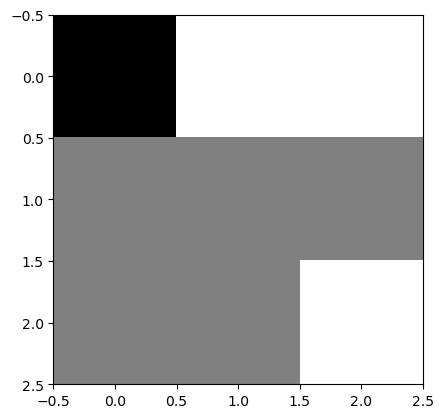

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [6]:
toy_image=np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image,cmap='gray')
plt.show()
print("toy_image:",toy_image)

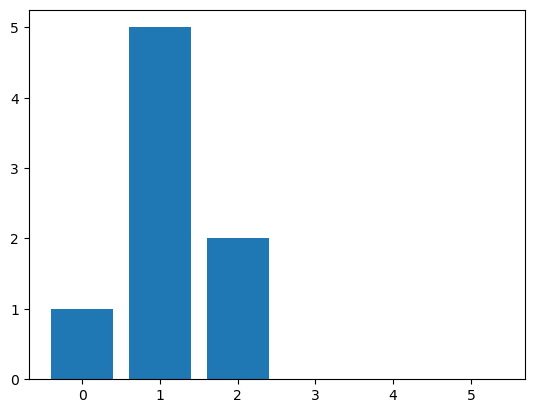

In [7]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

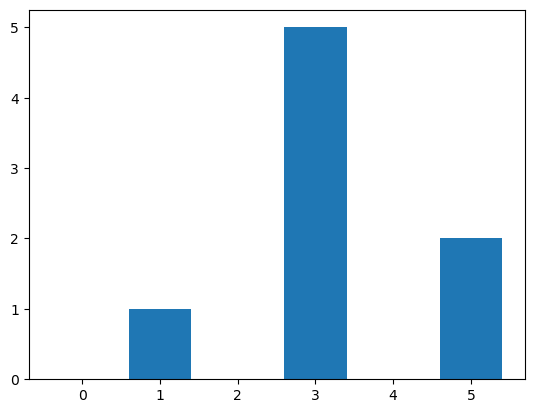

In [8]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

# gray Scale Histograms

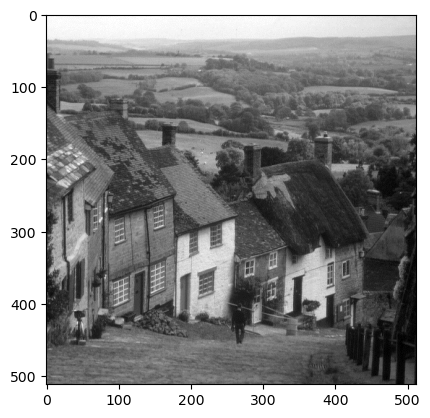

In [12]:
goldhill=cv2.imread('datasets/goldhill.bmp',cv2.IMREAD_GRAYSCALE)
plt.imshow(goldhill,cmap='gray')

In [13]:
hist=cv2.calcHist([goldhill],[0],None,[256],[0,256])

Text(0.5, 1.0, 'bar')

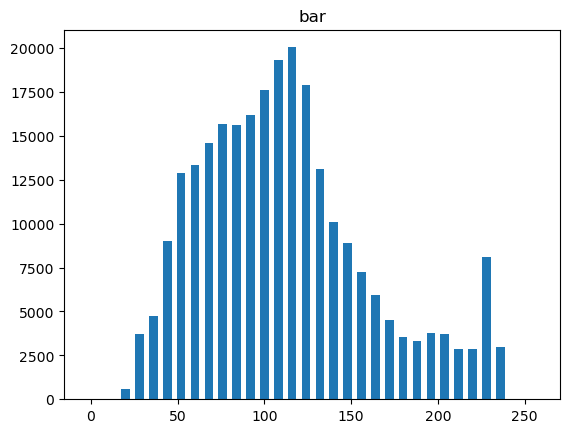

In [15]:
intensity_values=np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values,hist[:,0],width=5)
plt.title('bar')

# probability mass function

In [19]:
pmf=hist/(goldhill.shape[0]*goldhill.shape[1])
pmf

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00215149],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01409912],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01804352],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03429413],
       [0.        ],
       [0.        ],
       [0.   

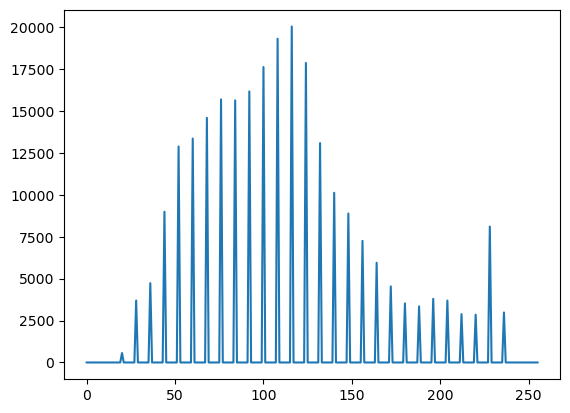

In [17]:
plt.plot(intensity_values,hist)
plt.show()

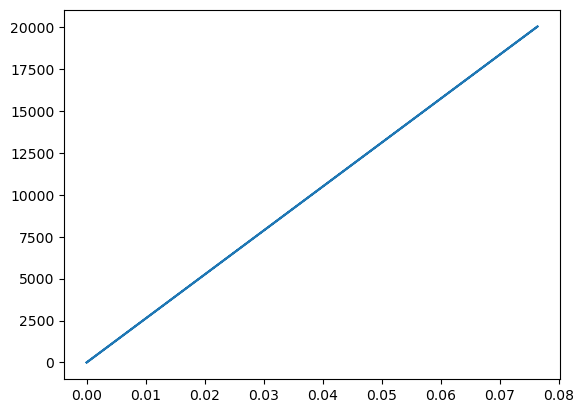

In [20]:
plt.plot(pmf,hist)
plt.show()

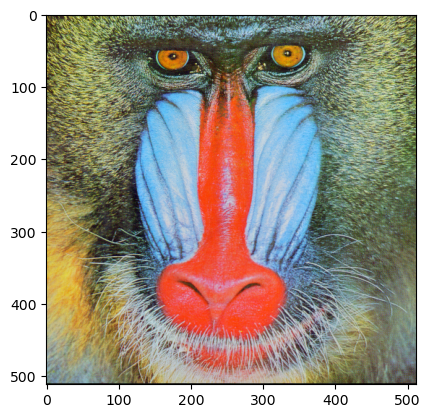

In [21]:
baboon=cv2.imread('datasets/baboon.png')
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

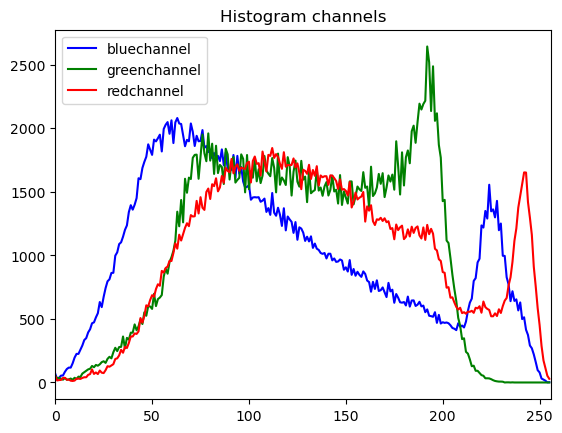

In [23]:
color=('blue','green','red')
for i,col in enumerate(color):
    histr=cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color=col,label=col+'channel')
    plt.xlim([0,256])
plt.legend()
plt.title('Histogram channels')
plt.show()

# intensity Transformations 

# image negatives 

In [24]:
neg_toy_image=-1*toy_image+255
print(toy_image)
print(neg_toy_image)

[[0 2 2]
 [1 1 1]
 [1 1 2]]
[[255 253 253]
 [254 254 254]
 [254 254 253]]


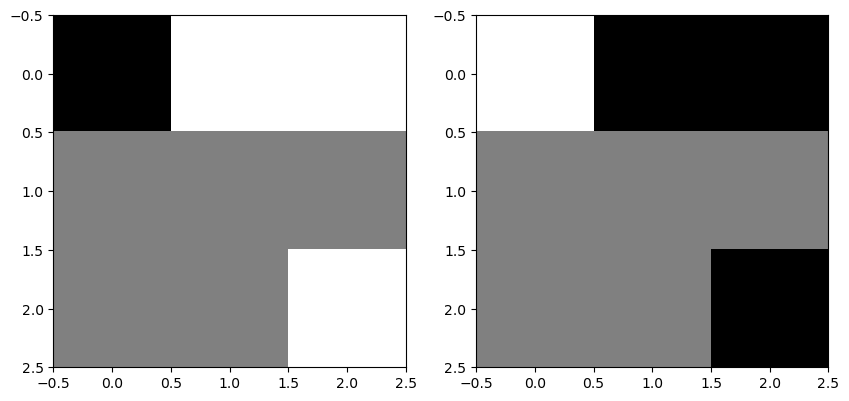

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(toy_image,cmap='gray')
plt.subplot(122)
plt.imshow(neg_toy_image,cmap='gray')

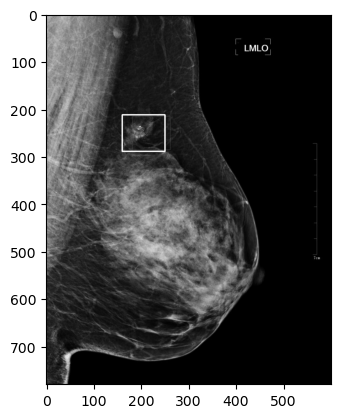

In [30]:
image=cv2.imread('datasets/mammogram.png',cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)
plt.imshow(image,cmap='grey')

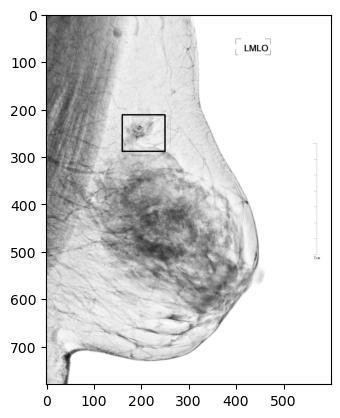

In [31]:
img_neg=-1*image+255
plt.imshow(img_neg,cmap='grey')

# brightness and contrast adjustments

In [32]:
alpha =1 
beta =100
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

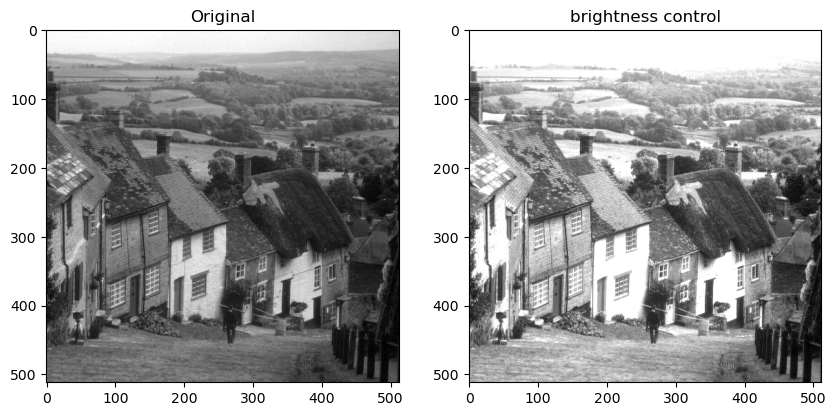

In [33]:
plot_image(goldhill,new_image,title_1='Original',title_2='brightness control')

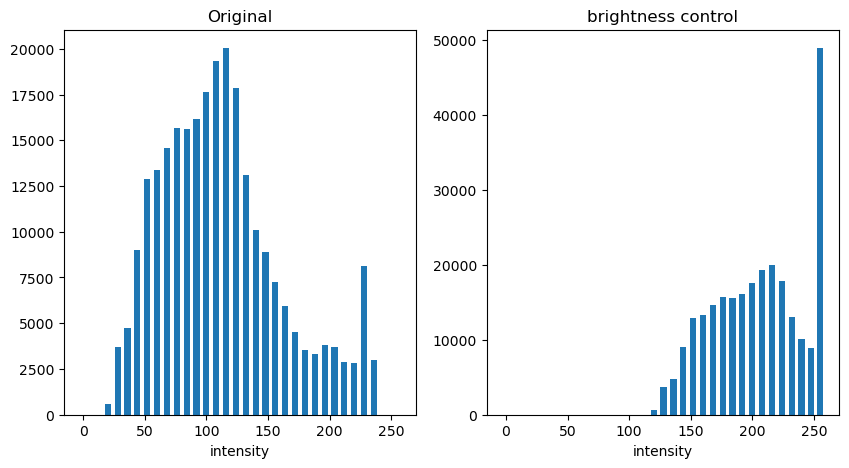

In [36]:
plt.figure(figsize=(10,5))
plot_hist(goldhill,new_image,'Original','brightness control')

# increase the contrast by increasing the alpha value

In [43]:
alpha =2
beta =0
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

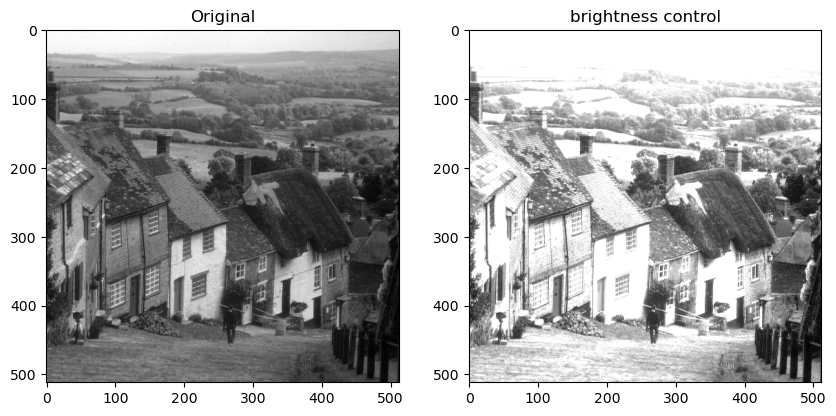

In [44]:
plot_image(goldhill,new_image,title_1='Original',title_2='brightness control')

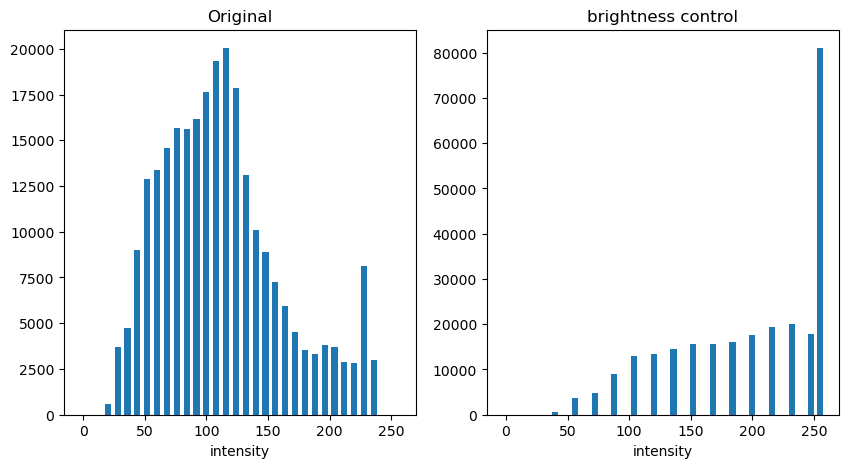

In [45]:
plt.figure(figsize=(10,5))
plot_hist(goldhill,new_image,'Original','brightness control')

When plotting the image we see it's too bright. We can adapt the brightness by making the image darker and increasing the contrast at the same time.

In [48]:
plt.figure(figsize=(10,5))
alpha=3
beta=-200
new_image=cv2.convertScaleAbs(goldhill,alpha=alpha,beta=beta)

<Figure size 1000x500 with 0 Axes>

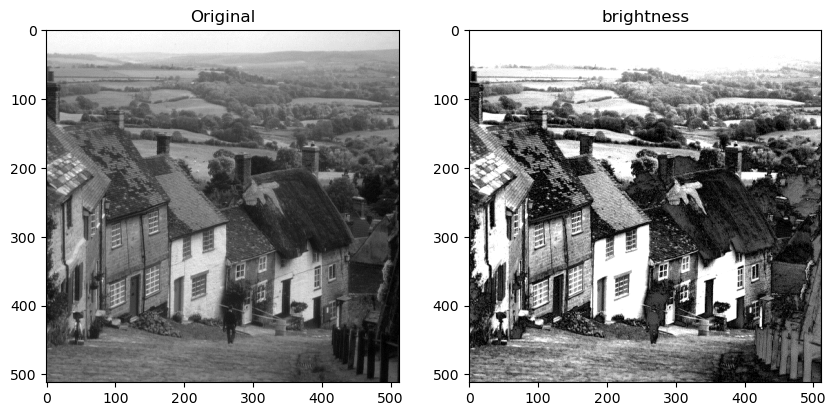

In [49]:
plot_image(goldhill,new_image,'Original','brightness')

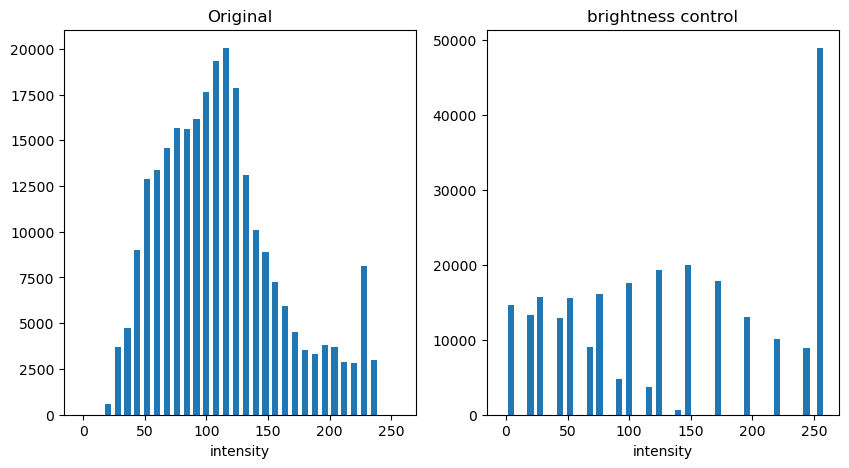

In [50]:
plt.figure(figsize=(10,5))
plot_hist(goldhill,new_image,'Original','brightness control')

There are other nonlinear methods to improve contrast and brightness, these methods have different sets of parameters. In general, it’s difficult to manually adjust the contrast and brightness parameter, but there are algorithms that improve contrast automatically.

# Histogram Equalization

In [51]:
zelda=cv2.imread('datasets/zelda.png',cv2.IMREAD_GRAYSCALE)
new_zelda=cv2.equalizeHist(zelda)

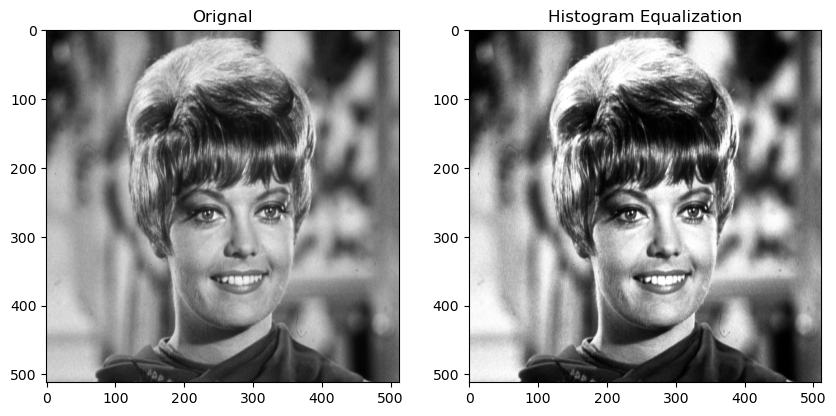

In [54]:
plot_image(zelda,new_zelda,"Orignal","Histogram Equalization")

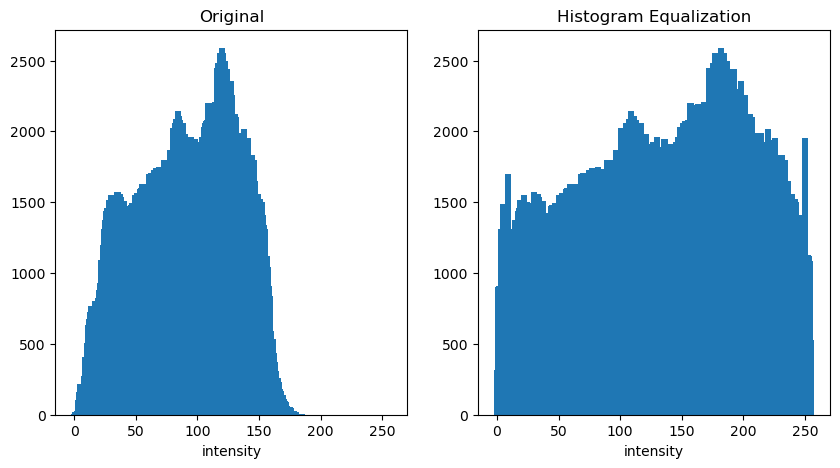

In [56]:
plt.figure(figsize=(10,5))
plot_hist(zelda,new_zelda,'Original','Histogram Equalization')

# Thresholding and Simple Segmentation

In [59]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out 

In [60]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

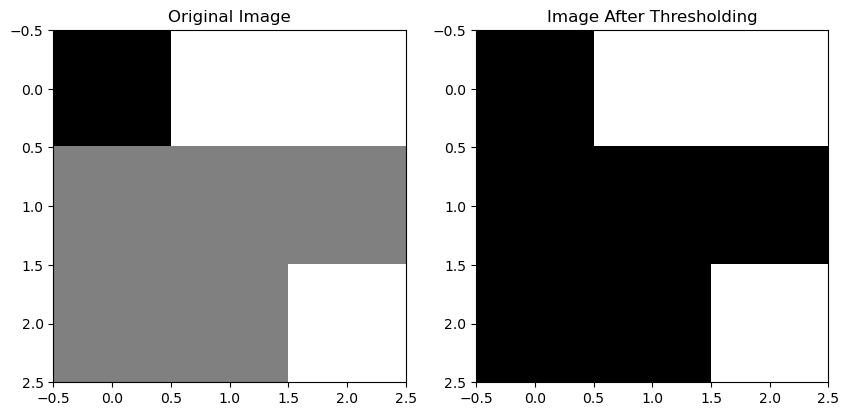

In [61]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

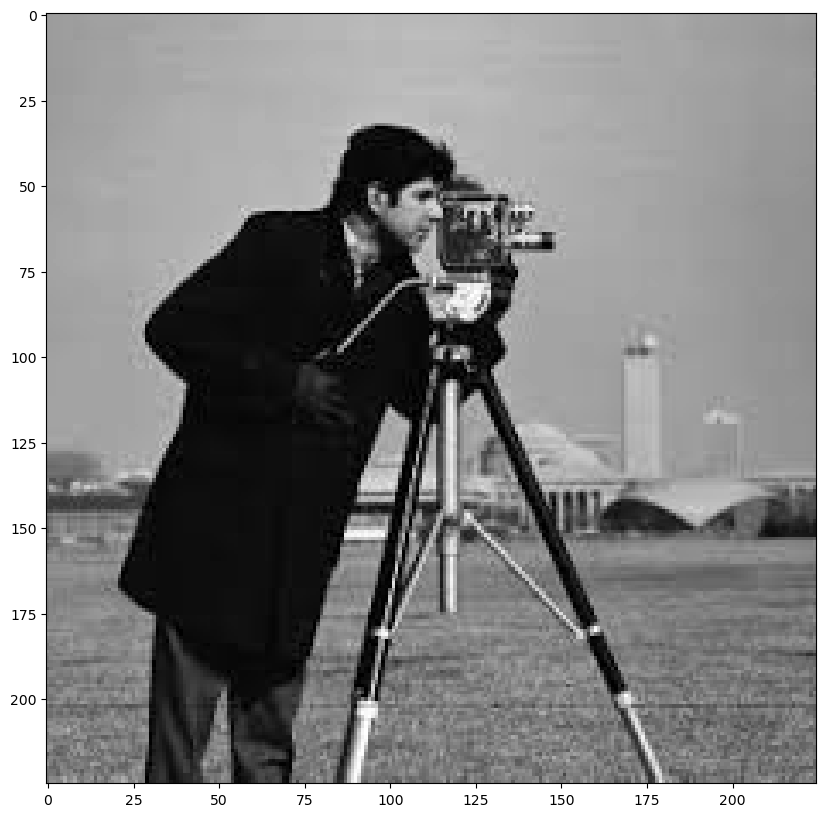

In [63]:
image = cv2.imread("datasets/cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap="gray")
plt.show()

In [64]:
threshold = 1
max_value = 2
min_value = 0
thresholding_guy = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_guy

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

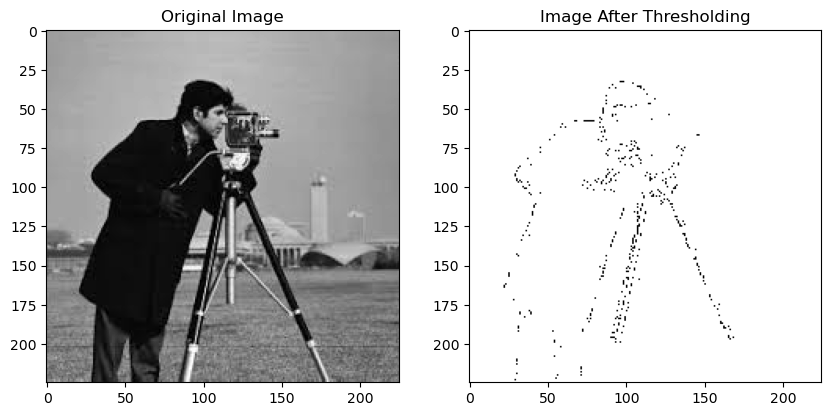

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_guy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

In [67]:
threshold = 87
max_value = 255
min_value = 0
thresholding_guy = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_guy

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

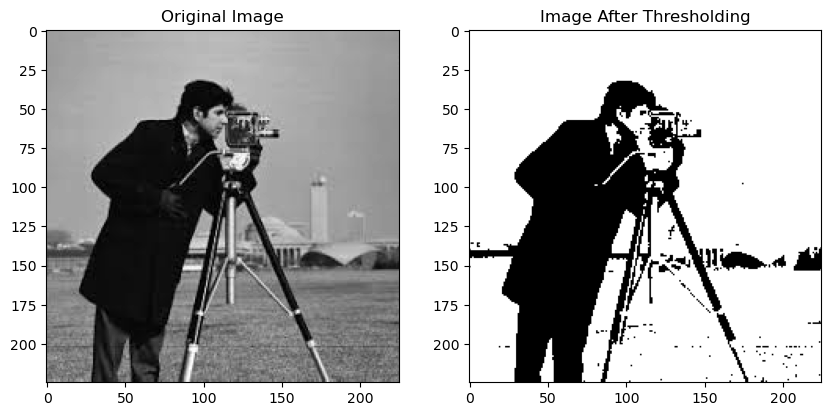

In [68]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_guy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

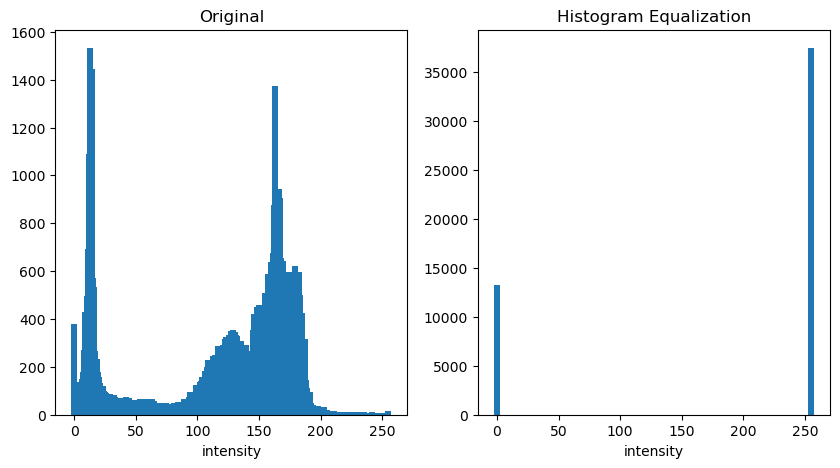

In [69]:
plt.figure(figsize=(10,5))
plot_hist(image,thresholding_guy,'Original','Histogram Equalization')

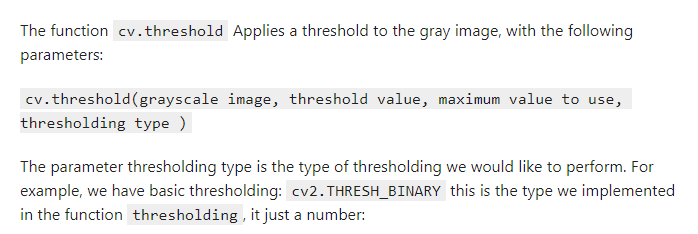

<Figure size 1000x500 with 0 Axes>

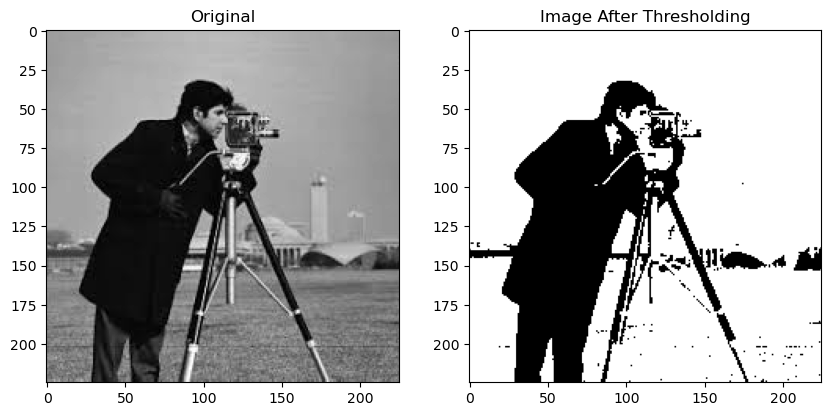

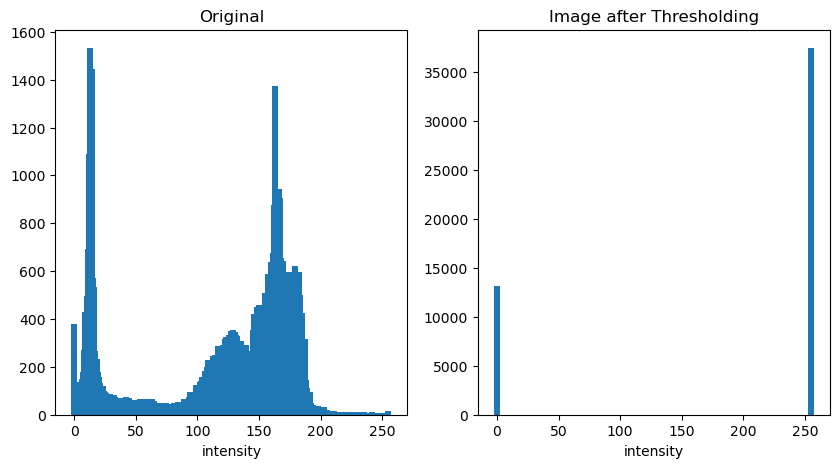

In [83]:
ret, new_image=cv2.threshold(image,86,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,5))
plot_image(image,new_image,'Original','Image After Thresholding')
plt.figure(figsize=(10,5))
plot_hist(image,new_image,'Original','Image after Thresholding')

In [75]:
ret

87.0

<Figure size 1000x500 with 0 Axes>

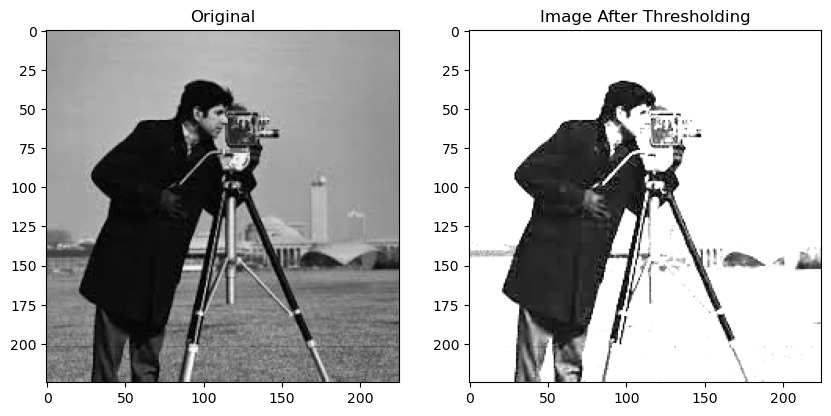

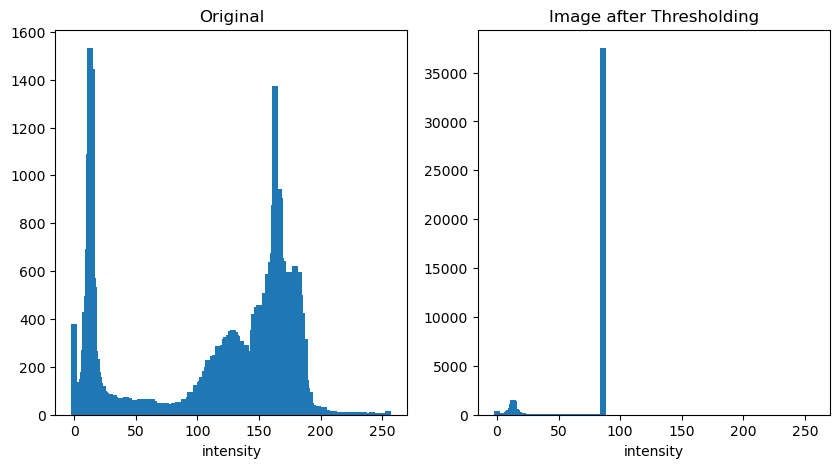

In [84]:
ret, new_image=cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plt.figure(figsize=(10,5))
plot_image(image,new_image,'Original','Image After Thresholding')
plt.figure(figsize=(10,5))
plot_hist(image,new_image,'Original','Image after Thresholding')

In [85]:
ret

86.0